# Introduction to classification

* Binary classification
* Multiclass classification
* Multilabel classification

In [1]:
# Import tf
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
# Create data to view and fit
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# aRRANGE TO BETTER UNDERSTAND
import pandas as pd
import numpy as np
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles


,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


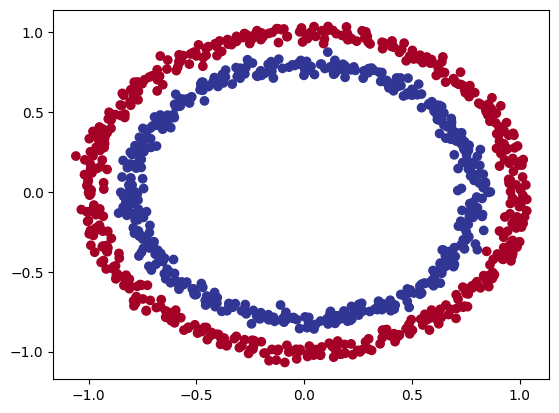

In [4]:
# Visualize with a plot

import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdYlBu ) # mapa de color--> cmap,  color = yelow (y)

# Steps in modeling

In [5]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation=tf.keras.activations.sigmoid),
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.02), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model.fit(X, y, epochs=100)


Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 0.7133 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6893 - accuracy: 0.5250
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6887 - accuracy: 0.5230
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6882 - accuracy: 0.5100
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.5510
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6862 - accuracy: 0.5400
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6852 - accuracy: 0.5370
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6844 - accuracy: 0.5200
Epoch 11/

In [6]:
model.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9920


[0.050551656633615494, 0.9919999837875366]

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [8]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


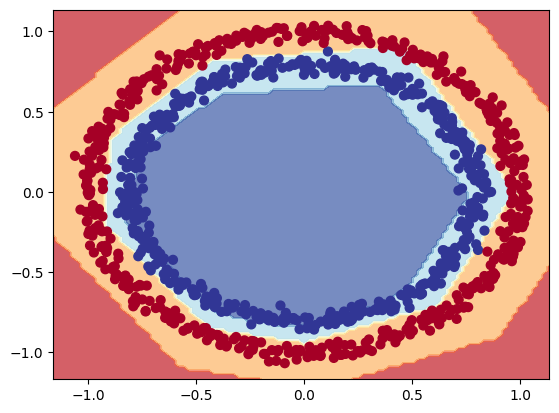

In [9]:
plot_decision_boundary(model=model, X=X, y=y)

# Plot Metrics

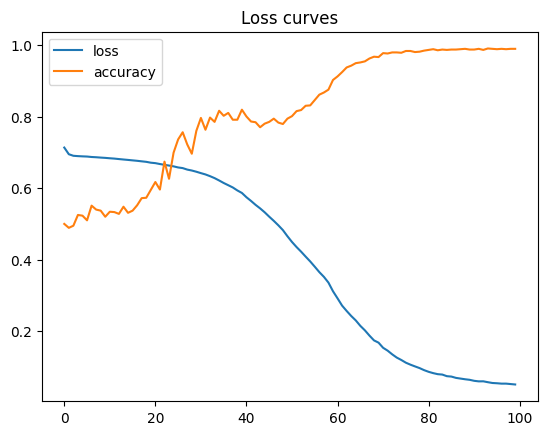

In [10]:
# Plot curves
pd.DataFrame(history.history).plot()
plt.title("Loss curves");


# Finding the best learning rate

In [11]:
# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set 
     

((800, 2), (200, 2))

In [12]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_1.compile(loss="binary_crossentropy",
                optimizer = "Adam",
                metrics=["accuracy"])

# Creating a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

# Fit the model

history = model_1.fit(X_train,
                        y_train,
                        epochs=60,
                        callbacks=[lr_scheduler]
                        )

Epoch 1/60
25/25 [==============================] - 1s 2ms/step - loss: 0.7074 - accuracy: 0.4975 - lr: 1.0000e-04
Epoch 2/60
25/25 [==============================] - 0s 2ms/step - loss: 0.7059 - accuracy: 0.4938 - lr: 1.1220e-04
Epoch 3/60
25/25 [==============================] - 0s 2ms/step - loss: 0.7042 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/60
25/25 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/60
25/25 [==============================] - 0s 2ms/step - loss: 0.7008 - accuracy: 0.5025 - lr: 1.5849e-04
Epoch 6/60
25/25 [==============================] - 0s 2ms/step - loss: 0.6988 - accuracy: 0.5050 - lr: 1.7783e-04
Epoch 7/60
25/25 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.5050 - lr: 1.9953e-04
Epoch 8/60
25/25 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/60
25/25 [==============================] - 0s 2ms/step - loss: 0.6932 -

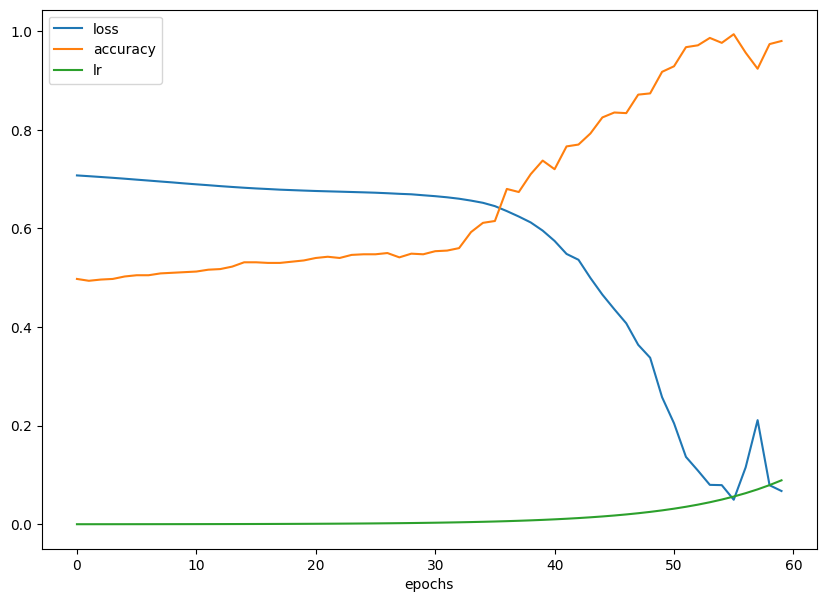

In [13]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

## Learning rate
The ideal learning rate at the start of model training is somewhere just before the loss curve bottoms out (a value where the loss is still decreasing) --> 0.1

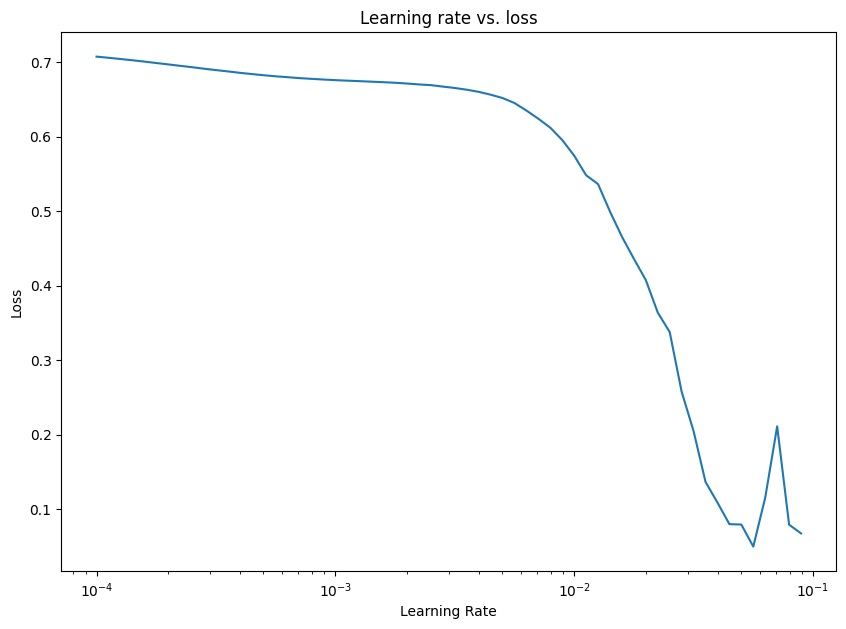

In [16]:

# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(60)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

# Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
# Make predictions
y_preds = model_1.predict(X_test)
y_preds

In [18]:
# Create the confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 4, 95]])

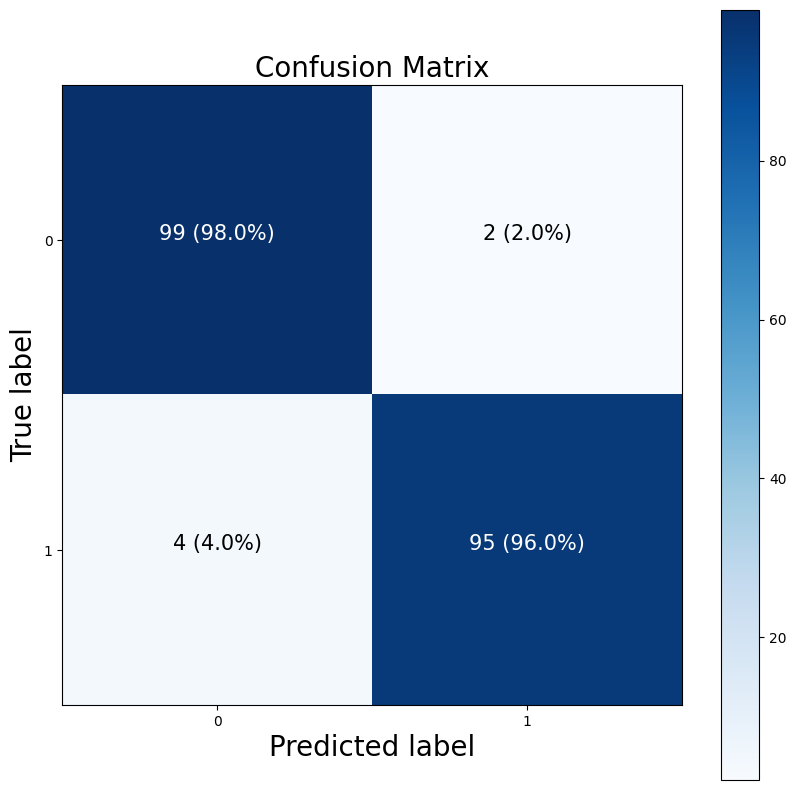

In [19]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)
     
